In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata
from mpl_toolkits.mplot3d import axes3d

In [2]:
#load the data from CBS, this might take a while..
#Taking the DBs from 2015 onwards, since 2014 and prior used a different format..
buurt_data_15 = pd.DataFrame(cbsodata.get_data("83220NED"))
buurt_data_16 = pd.DataFrame(cbsodata.get_data("83487NED"))
buurt_data_17 = pd.DataFrame(cbsodata.get_data("83765NED"))
buurt_data_18 = pd.DataFrame(cbsodata.get_data("84286NED"))
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")
businesses_1519 = pd.read_csv("data/businesses15-19.csv",sep=";")
buurt_name_list = pd.read_csv("data/buurten.csv",sep=";")

In [3]:
#First, start by defining the neighborhood codes for each neighborhood.
#This will be used as indexnumbers for the different datasets
buurt_code = buurt_name_list[["BUURTCODE","BUURTNAAM"]]

In [4]:
dh_buurt_data_15 = buurt_data_15[(buurt_data_15["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_15["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_16 = buurt_data_16[(buurt_data_16["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_16["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_17 = buurt_data_17[(buurt_data_17["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_17["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_18 = buurt_data_18[(buurt_data_18["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_18["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]

In [5]:
total_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
total_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
total_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_94','AfstandTotGroteSupermarkt_95','AfstandTotKinderdagverblijf_96','AfstandTotSchool_97']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_94':'dist_GP','AfstandTotGroteSupermarkt_95':'dist_super','AfstandTotKinderdagverblijf_96':'dist_nursery','AfstandTotSchool_97':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
total_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
total_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [6]:
amenities_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
amenities_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
amenities_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_94','AfstandTotGroteSupermarkt_95','AfstandTotKinderdagverblijf_96','AfstandTotSchool_97']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_94':'dist_GP','AfstandTotGroteSupermarkt_95':'dist_super','AfstandTotKinderdagverblijf_96':'dist_nursery','AfstandTotSchool_97':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
amenities_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
amenities_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [7]:
citizens_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
citizens_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
citizens_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
citizens_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)
citizens_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [8]:
businesses_1519 = businesses_1519.drop(114)

In [9]:
businesses_1519["Buurten"] = businesses_1519["Buurten"].str.extract('(\d+)', expand=False).astype("int64")

In [10]:
businesses_1519 = businesses_1519.merge(buurt_code, left_on='Buurten', right_on='BUURTCODE',validate="1:1").set_index("BUURTCODE").drop("Buurten",axis=1)

In [11]:
businesses_15 = businesses_1519.filter(regex='2015')
businesses_15.columns = ["landbouw, bosbouw en visserij","winning van delfstoffen","industrie","productie, distributie en handel in elektriciteit en aardgas","winning/ distributie van water; afval(water)beheer, sanering","bouwnijverheid","groot- en detailhandel; reparatie van auto's","vervoer en opslag","logies-, maaltijd- en drankverstrekking","informatie en communicatie","financiele instellingen","verhuur van en handel in onroerend goed","advisering, onderzoek, special. zakelijke dienstverlening","verhuur van roerende goederen, overige zakelijke dienstverlening","openbaar bestuur, overheidsdiensten, sociale verzekeringen","onderwijs","gezondheids- en welzijnszorg","cultuur, sport en recreatie","overige dienstverlening","extraterritoriale organisaties en lichamen"]
businesses_16 = businesses_1519.filter(regex='2016')
businesses_16.columns = ["landbouw, bosbouw en visserij","winning van delfstoffen","industrie","productie, distributie en handel in elektriciteit en aardgas","winning/ distributie van water; afval(water)beheer, sanering","bouwnijverheid","groot- en detailhandel; reparatie van auto's","vervoer en opslag","logies-, maaltijd- en drankverstrekking","informatie en communicatie","financiele instellingen","verhuur van en handel in onroerend goed","advisering, onderzoek, special. zakelijke dienstverlening","verhuur van roerende goederen, overige zakelijke dienstverlening","openbaar bestuur, overheidsdiensten, sociale verzekeringen","onderwijs","gezondheids- en welzijnszorg","cultuur, sport en recreatie","overige dienstverlening","extraterritoriale organisaties en lichamen"]
businesses_17 = businesses_1519.filter(regex='2017')
businesses_17.columns = ["landbouw, bosbouw en visserij","winning van delfstoffen","industrie","productie, distributie en handel in elektriciteit en aardgas","winning/ distributie van water; afval(water)beheer, sanering","bouwnijverheid","groot- en detailhandel; reparatie van auto's","vervoer en opslag","logies-, maaltijd- en drankverstrekking","informatie en communicatie","financiele instellingen","verhuur van en handel in onroerend goed","advisering, onderzoek, special. zakelijke dienstverlening","verhuur van roerende goederen, overige zakelijke dienstverlening","openbaar bestuur, overheidsdiensten, sociale verzekeringen","onderwijs","gezondheids- en welzijnszorg","cultuur, sport en recreatie","overige dienstverlening","extraterritoriale organisaties en lichamen"]
businesses_18 = businesses_1519.filter(regex='2018')
businesses_18.columns = ["landbouw, bosbouw en visserij","winning van delfstoffen","industrie","productie, distributie en handel in elektriciteit en aardgas","winning/ distributie van water; afval(water)beheer, sanering","bouwnijverheid","groot- en detailhandel; reparatie van auto's","vervoer en opslag","logies-, maaltijd- en drankverstrekking","informatie en communicatie","financiele instellingen","verhuur van en handel in onroerend goed","advisering, onderzoek, special. zakelijke dienstverlening","verhuur van roerende goederen, overige zakelijke dienstverlening","openbaar bestuur, overheidsdiensten, sociale verzekeringen","onderwijs","gezondheids- en welzijnszorg","cultuur, sport en recreatie","overige dienstverlening","extraterritoriale organisaties en lichamen"]
businesses_19 = businesses_1519.filter(regex='2019')
businesses_19.columns = ["landbouw, bosbouw en visserij","winning van delfstoffen","industrie","productie, distributie en handel in elektriciteit en aardgas","winning/ distributie van water; afval(water)beheer, sanering","bouwnijverheid","groot- en detailhandel; reparatie van auto's","vervoer en opslag","logies-, maaltijd- en drankverstrekking","informatie en communicatie","financiele instellingen","verhuur van en handel in onroerend goed","advisering, onderzoek, special. zakelijke dienstverlening","verhuur van roerende goederen, overige zakelijke dienstverlening","openbaar bestuur, overheidsdiensten, sociale verzekeringen","onderwijs","gezondheids- en welzijnszorg","cultuur, sport en recreatie","overige dienstverlening","extraterritoriale organisaties en lichamen"]

In [91]:
businesses_change_1516 = (businesses_16 - businesses_15) / businesses_15 * 100
businesses_change_1516 = businesses_change_1516.replace(np.inf,100)
businesses_change_1617 = (businesses_17 - businesses_16) / businesses_16 * 100
businesses_change_1617 = businesses_change_1617.replace(np.inf,100)
businesses_change_1718 = (businesses_18 - businesses_17) / businesses_17 * 100
businesses_change_1718 = businesses_change_1718.replace(np.inf,100)
businesses_change_1819 = (businesses_19 - businesses_18) / businesses_18 * 100
businesses_change_1819 = businesses_change_1819.replace(np.inf,100)

In [99]:
businesses_change = pd.concat([businesses_change_1516,businesses_change_1617,businesses_change_1718,businesses_change_1819], keys=["15-16","16-17","17-18","18-19"])

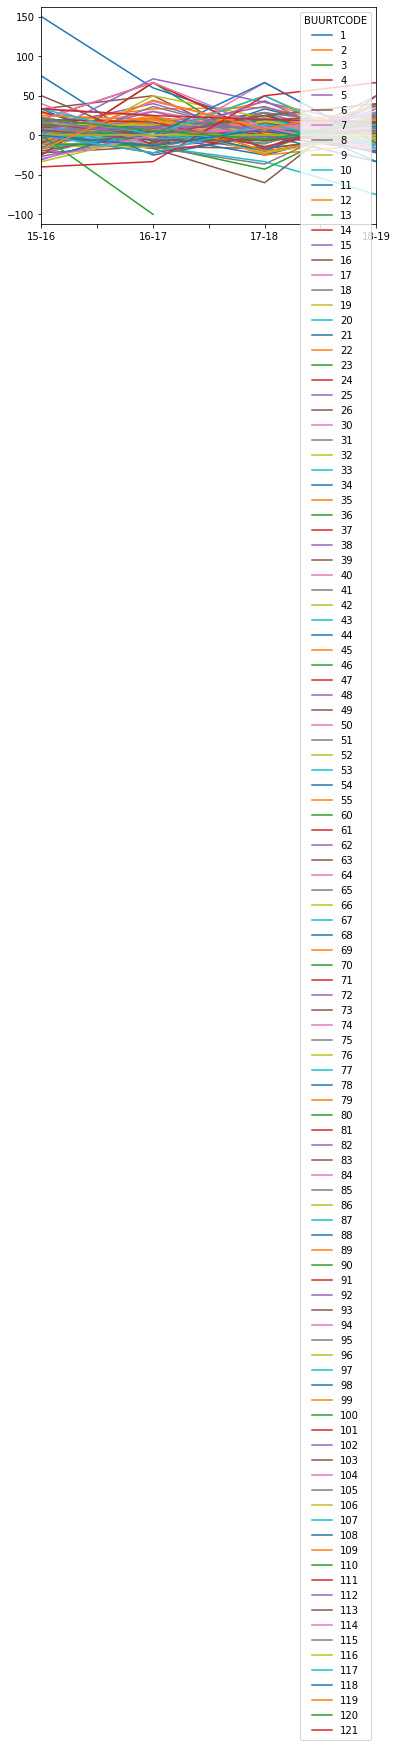

In [101]:
businesses_change.unstack(0)["cultuur, sport en recreatie"].T.plot()

In [20]:
businesses_dh = pd.concat([businesses_15,businesses_16,businesses_17,businesses_18,businesses_19], keys=pd.Series(pd.period_range('1/1/2015', freq='Y', periods=5)))

In [22]:
amenities_dh = pd.concat([amenities_dh_15,amenities_dh_16,amenities_dh_17,amenities_dh_18,amenities_dh_19], keys=pd.Series(pd.period_range('1/1/2015', freq='Y', periods=5)))

In [23]:
citizens_dh = pd.concat([citizens_dh_15,citizens_dh_16,citizens_dh_17,citizens_dh_18,citizens_dh_19], keys=pd.Series(pd.period_range('1/1/2015', freq='Y', periods=5)))

In [24]:
total_dh = pd.concat([total_dh_15,total_dh_16,total_dh_17,total_dh_18,total_dh_19], keys=pd.Series(pd.period_range('1/1/2015', freq='Y', periods=5)))

In [18]:
normalized_total_dh= (total_dh-total_dh.mean())/total_dh.std()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
normalized_total_dh.reset_index().rename(columns={"level_0":"year"}).groupby("buurtname").plot(x="year",legend=(None))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
citizens_dh["total_western"] = citizens_dh["total_western"] / citizens_dh["total_citizens"]
citizens_dh["morocco"] = citizens_dh["morocco"] / citizens_dh["total_citizens"]
citizens_dh["antilles"] = citizens_dh["antilles"] / citizens_dh["total_citizens"]
citizens_dh["suriname"] = citizens_dh["suriname"] / citizens_dh["total_citizens"]
citizens_dh["turkey"] = citizens_dh["turkey"] / citizens_dh["total_citizens"]
citizens_dh["other_non_western"] = citizens_dh["other_non_western"] / citizens_dh["total_citizens"]
citizens_dh = citizens_dh.fillna(0)
citizens_dh

In [ ]:
citizens_dh.unstack(level=0)

In [ ]:
amenities_dh.unstack(level=0)

In [ ]:
sns.heatmap(total_dh.corr())

In [ ]:
sns.heatmap(citizens_dh.corr())

In [ ]:
sns.heatmap(amenities_dh.corr())

In [ ]:
citizens_dh.unstack(1)["total_citizens"].columns

In [ ]:
diff_citizens = pd.DataFrame(columns=citizens_dh.unstack(1)["total_citizens"].columns)
diff_citizens = diff_citizens.append(pd.Series(name='2016-2015'))
diff_citizens = diff_citizens.append(pd.Series(name='2017-2016'))
diff_citizens = diff_citizens.append(pd.Series(name='2018-2017'))
diff_citizens = diff_citizens.append(pd.Series(name='2019-2018'))

for r in citizens_dh.unstack(0)["total_western"].iterrows():
    diff_citizens[r[0]][0] = r[1][2016] - r[1][2015]
    diff_citizens[r[0]][1] = r[1][2017] - r[1][2016]
    diff_citizens[r[0]][2] = r[1][2018] - r[1][2017]
    diff_citizens[r[0]][3] = r[1][2019] - r[1][2018]

In [ ]:
diff_amenities = pd.DataFrame(columns=citizens_dh.unstack(1)["total_citizens"].columns)
diff_amenities = diff_amenities.append(pd.Series(name='2016-2015'))
diff_amenities = diff_amenities.append(pd.Series(name='2017-2016'))
diff_amenities = diff_amenities.append(pd.Series(name='2018-2017'))
diff_amenities = diff_amenities.append(pd.Series(name='2019-2018'))

for r in amenities_dh.unstack(0)["avg_housevalue"].iterrows():
    diff_amenities[r[0]][0] = r[1][2016] - r[1][2015]
    diff_amenities[r[0]][1] = r[1][2017] - r[1][2016]
    diff_amenities[r[0]][2] = r[1][2018] - r[1][2017]
    diff_amenities[r[0]][3] = r[1][2019] - r[1][2018]

In [ ]:
diff_citizens

In [ ]:
corr_df = pd.DataFrame()

In [ ]:
for c in citizens_dh.columns:
    for a in amenities_dh.columns:
        print(c + " correlation with " + a)
        temp = pd.DataFrame(citizens_dh.unstack(1)[c].corrwith(amenities_dh.unstack(level=1)[a])).rename({0 : c+a}, axis =1)
        corr_df = pd.concat([corr_df, temp],axis=1)

In [ ]:
fig, ax = plt.subplots(figsize = (18, 18))

sns.heatmap(abs(corr_df), ax = ax)

In [ ]:
citizens_dh.groupby("buurtname")["other_non_western"].plot()